In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
data = pd.read_csv('ESSdata_Thinkful.csv')

In [4]:
data.cntry.value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [5]:
data.year.value_counts()

7    4297
6    4297
Name: year, dtype: int64

In [6]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [8]:
#lets start by creating a column joining country and year and drop na
data['year'] =  np.where(data['year'] == 6, 2012, 2014)
data_clean = data.dropna()

# 1. did people become less trusting from 2012 to 2014

In [8]:
# create trust dataframe
ppltrust = data[['cntry','year','ppltrst']]
ppltrust = ppltrust.dropna()

In [9]:
ppltrust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8580 entries, 0 to 8593
Data columns (total 3 columns):
cntry      8580 non-null object
year       8580 non-null int32
ppltrst    8580 non-null float64
dtypes: float64(1), int32(1), object(1)
memory usage: 234.6+ KB


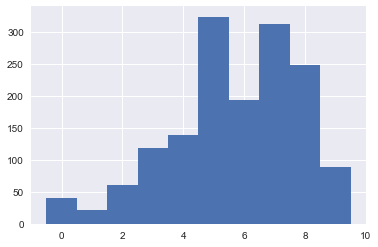

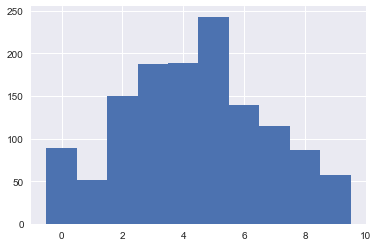

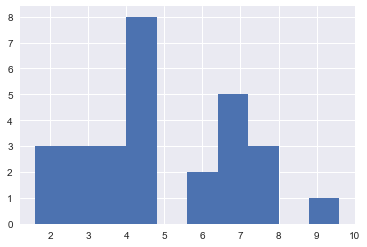

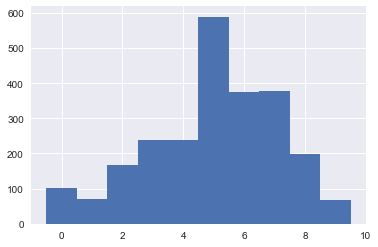

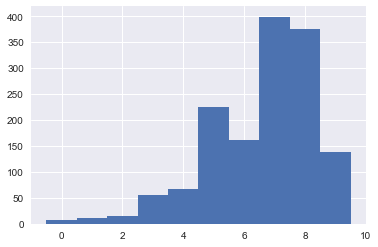

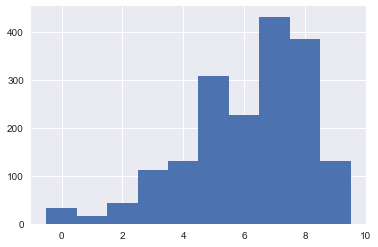

In [10]:
#now lets check for normality
for country in ppltrust['cntry'].unique():
    plt.hist(ppltrust[ppltrust['cntry'] == country]['ppltrst'].values,align='left')
    plt.show()

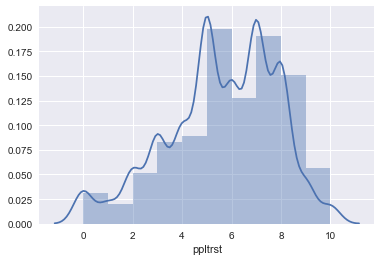

In [11]:
#lets also look at the distribution of the trust variable in total 
sns.distplot(ppltrust.ppltrst.dropna(),bins=10)
plt.show()

OK so while not perfectly normal, the distributions are close enough that parametric tests will be fine to use to evaluate the qustion. This question deals with paired samples, each country by each year, so lets use a paired t test. 

In [12]:
for country in data['cntry'].unique():
    print('{} Results:'.format(country))
    cntry = data[data['cntry'] == country]
    cntry_2012 = cntry[cntry['year'] == 2012]['ppltrst']
    cntry_2014 = cntry[cntry['year'] == 2014]['ppltrst']
    print(stats.ttest_rel(cntry_2012,cntry_2014,nan_policy='omit'))

CH Results:
Ttest_relResult(statistic=-0.65868517567257368, pvalue=0.51029435113011345)
CZ Results:
Ttest_relResult(statistic=-0.50016383368872164, pvalue=0.61712926824047398)
DE Results:
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.85685637970958051)
ES Results:
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320272)
NO Results:
Ttest_relResult(statistic=0.50730770811244041, pvalue=0.61209257015176999)
SE Results:
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.039007816709585447)


OK so it appears that only Spaina nd swesen have a significant change in trust, lets look at box plot

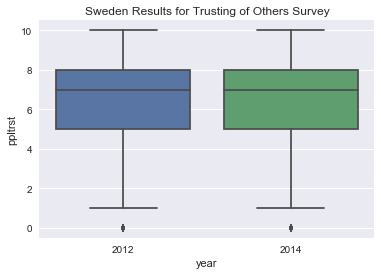

In [13]:

sns.boxplot(y="ppltrst", x="year", data=data[data['cntry']=='SE'])
sns.plt.title('Sweden Results for Trusting of Others Survey')
plt.show()

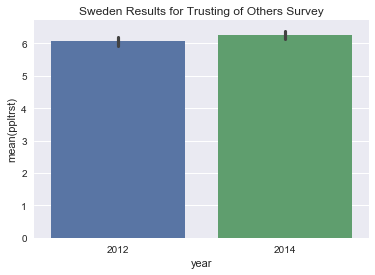

In [14]:
#Odd that there is no apparent difference. Lets look at the histogrtam
sns.barplot(y="ppltrst", x="year", data=data[data['cntry']=='SE'])
sns.plt.title('Sweden Results for Trusting of Others Survey')
plt.show()

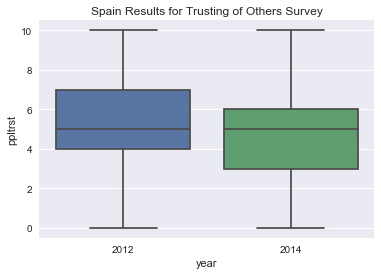

In [15]:
sns.boxplot(y="ppltrst", x="year", data=data[data['cntry']=='ES'])
sns.plt.title('Spain Results for Trusting of Others Survey')
plt.show()

ok so it looks like trust went slightly up for sweden and down for spain. But since this is multiple testing, would need to account for 6 comparisons, so would be a pvalue of .05/6, which none are lower than. 

# 2 Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [16]:
# create happy dataframe
happy= data[['cntry','year','happy']]
happy= happy.dropna()

In [17]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8563 entries, 0 to 8593
Data columns (total 3 columns):
cntry    8563 non-null object
year     8563 non-null int32
happy    8563 non-null float64
dtypes: float64(1), int32(1), object(1)
memory usage: 234.1+ KB


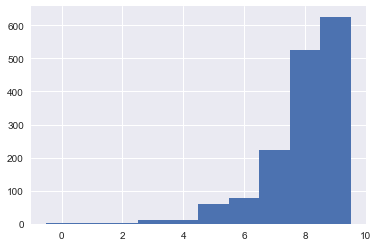

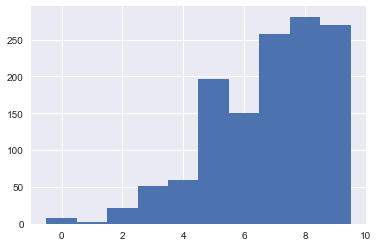

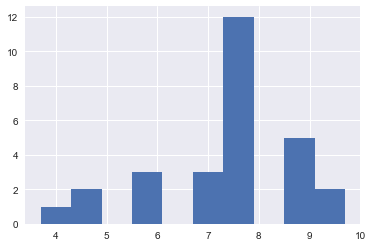

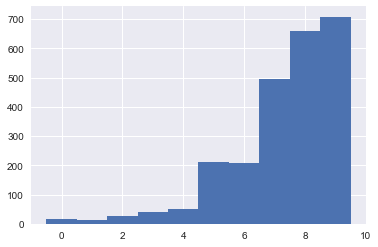

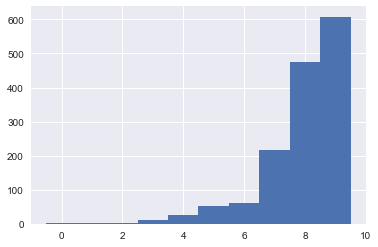

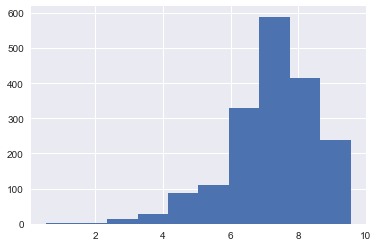

In [18]:
#now lets check for normality
for country in happy['cntry'].unique():
    plt.hist(happy[happy['cntry'] == country]['happy'].values,align='left')
    plt.show()

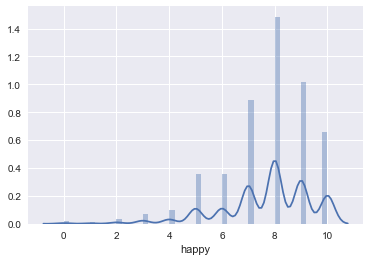

In [19]:
#lets also look at the distribution of the happy variable in total 
sns.distplot(happy.happy.dropna())
plt.show()

OK so there is some skew in distributions and not every country has similar distrivutions but the overall happy variable seems to be close to normal, so lets use the same test

In [20]:
for country in data['cntry'].unique():
    print('{} Results:'.format(country))
    cntry = data[data['cntry'] == country]
    cntry_2012 = cntry[cntry['year'] == 2012]['happy']
    cntry_2014 = cntry[cntry['year'] == 2014]['happy']
    print(stats.ttest_rel(cntry_2012,cntry_2014,nan_policy='omit'))

CH Results:
Ttest_relResult(statistic=-0.31941295786223201, pvalue=0.74950013554290629)
CZ Results:
Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.14584548433894509)
DE Results:
Ttest_relResult(statistic=-0.80622577482985491, pvalue=0.43461387077349911)
ES Results:
Ttest_relResult(statistic=1.613832417735418, pvalue=0.10682451556479494)
NO Results:
Ttest_relResult(statistic=4.2856826576235925, pvalue=2.067453013405473e-05)
SE Results:
Ttest_relResult(statistic=-0.55816370860300124, pvalue=0.57687095912337139)


OK so here it looks like only Normway is showing a significant difference. Lets take a closer look. note tgat woyld need to evaluate based on p value of .05/6

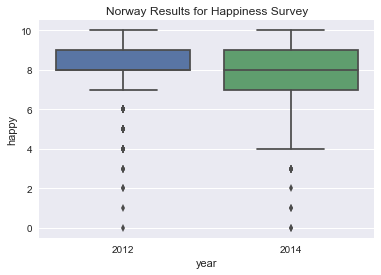

In [21]:

sns.boxplot(y="happy", x="year", data=data[data['cntry']=='NO'])
sns.plt.title('Norway Results for Happiness Survey')
plt.show()

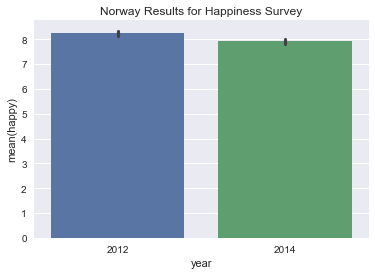

In [22]:
#Odd that there is no apparent difference. Lets look at the histogrtam
sns.barplot(y="happy", x="year", data=data[data['cntry']=='NO'])
sns.plt.title('Norway Results for Happiness Survey')
plt.show()

OK so it looks like happiness actually went fown for Norway, although there does appear to be the preseence of outliers in the lower direction. Overall though, we can't say that happiness went up overall based on the results. 

# 3. Who reported watching more TV in 2012, men or women?

In [23]:
# create trust dataframe
gndrtv= data[data['year']==2012][['gndr','year','tvtot']]
gndrtv = gndrtv.dropna()

In [24]:
gndrtv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4291 entries, 0 to 7685
Data columns (total 3 columns):
gndr     4291 non-null float64
year     4291 non-null int32
tvtot    4291 non-null float64
dtypes: float64(2), int32(1)
memory usage: 117.3 KB


In [25]:
gndrtv.gndr.value_counts()

1.0    2151
2.0    2140
Name: gndr, dtype: int64

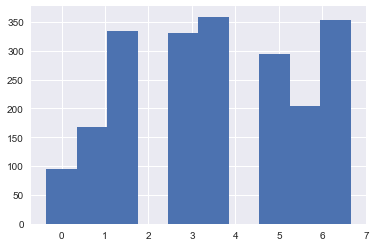

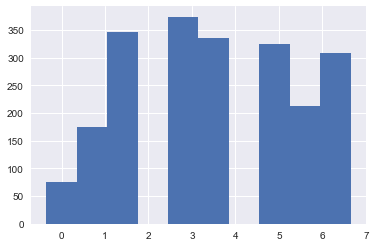

In [26]:
#now lets check for normality
for gender in gndrtv['gndr'].unique():
    plt.hist(gndrtv[gndrtv['gndr'] == gender]['tvtot'].values,align='left')
    plt.show()

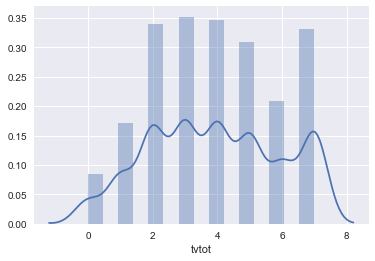

In [27]:
#lets also look at the distribution of the trust variable in total 
sns.distplot(gndrtv.tvtot.dropna())
plt.show()

Less evidence of normality here. This experiment type uses two independent groups, men and woman, so there are a few tests we can use. I am going to use Mann-Whitney test here which is good for comparing two samples

In [28]:
men_tvtot= gndrtv[gndrtv['gndr'] == 1]
women_tvtot = gndrtv[gndrtv['gndr'] == 2]
print(stats.mannwhitneyu(men_tvtot['tvtot'],women_tvtot['tvtot']))

MannwhitneyuResult(statistic=2271081.5, pvalue=0.22382598497660156)


Looks like we can't reject the null that there is a signifcant difference in tv watching between men and womnen. 

## 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [9]:
# create fairness dataframe
fairness= data[data['year']==2012][['partner','year','pplfair']]
fairness = fairness.dropna()


In [10]:
fairness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4271 entries, 0 to 7685
Data columns (total 3 columns):
partner    4271 non-null float64
year       4271 non-null int32
pplfair    4271 non-null float64
dtypes: float64(2), int32(1)
memory usage: 116.8 KB


In [11]:
fairness.partner.value_counts()

1.0    2663
2.0    1608
Name: partner, dtype: int64

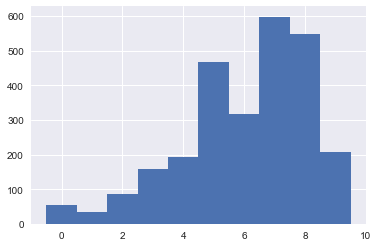

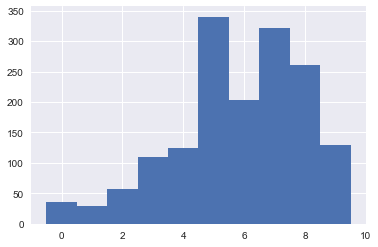

In [32]:
for partner in fairness['partner'].unique():
    plt.hist(fairness[fairness['partner'] == partner]['pplfair'].values,align='left', bins =10)
    plt.show()

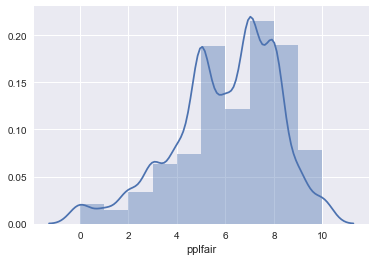

In [34]:
#lets also look at the distribution of the fairness variable in total 
sns.distplot(fairness.pplfair.dropna(), bins=10)
plt.show()

lets try a shaprio test just to be sure. but this looks close to mornal 

In [35]:
stats.shapiro(fairness['pplfair'])

(0.9475398063659668, 1.4641028229922702e-36)

In [13]:
stats.shapiro(fairness['pplfair'].sample(10))

(0.9237208366394043, 0.3890361189842224)

#low p value but it does seem rpetty normal still. lets also examine the distribtion of the two groups with boxplots

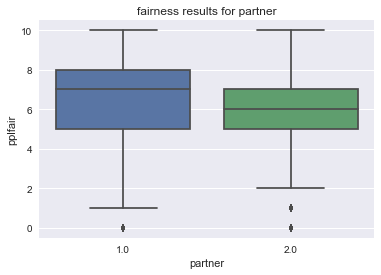

In [36]:

sns.boxplot(y="pplfair", x="partner", data=data[data['year']==2012])
sns.plt.title('fairness results for partner')
plt.show()

The shape of the distribution between the two groups is a little different, there is slightly more dispersion in the group where subjects live with a significant other. The medians of the two groups are different.

In [40]:
partner_fair= fairness[fairness['partner'] == 1]
alone_fair = fairness[fairness['partner'] == 2]
print(stats.kruskal(partner_fair['pplfair'],alone_fair['pplfair'],nan_policy='omit'))

KruskalResult(statistic=13.739649374653519, pvalue=0.00020997468964373384)


In [41]:
print(stats.ttest_ind(partner_fair['pplfair'],alone_fair['pplfair']))

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.00090739526098837563)


SIGNIFICANCE! looks like those with a partner are more trusting than those without 


# 5 Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [42]:
# create fairness dataframe
social= data[data['year']==2014][['cntry','year','sclmeet']]
social = social.dropna()

In [43]:
social.cntry.value_counts()

ES    1211
SE     908
CH     772
NO     731
CZ     655
DE      14
Name: cntry, dtype: int64

Going to pick Switzerland, Norway, and CZECH as they have similar sample sizes

In [44]:
social= social[social.cntry.isin(['NO','CH','CZ'])]


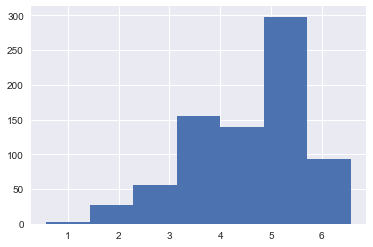

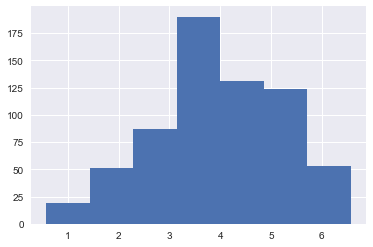

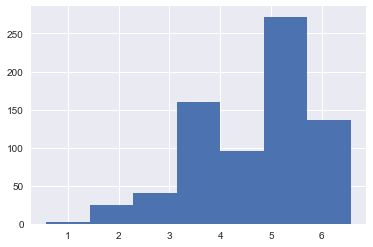

In [47]:
for country in social['cntry'].unique():
    plt.hist(social[social['cntry'] == country]['sclmeet'].values,align='left', bins =7)
    plt.show()

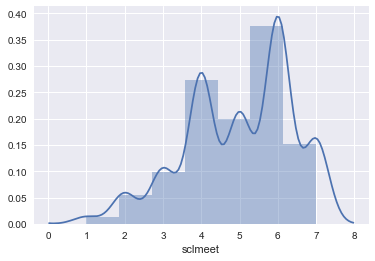

In [48]:
#lets also look at the distribution of the social meets variable in total 
sns.distplot(social.sclmeet.dropna(), bins=7)
plt.show()

In [50]:
#lets do a shapiro test 
stats.shapiro(social['sclmeet'])

(0.9153443574905396, 3.960417526756879e-33)

This could be mormal but its fairly borderline. We now need to see if the groups (or one of the groups) are differetnt from eachother. Lets do that with a one-way anova

In [49]:
NO_scl= social[social['cntry'] == 'NO']
CH_scl= social[social['cntry'] == 'CH']
CZ_scl= social[social['cntry'] == 'CZ']

stats.f_oneway(NO_scl.sclmeet, CH_scl.sclmeet, CZ_scl.sclmeet)

F_onewayResult(statistic=75.955110168193556, pvalue=1.3300453574407231e-32)

there appears to be a statistical diff between the groups. We can confirm with a KW test which is non para version of anova. 

In [51]:
stats.kruskal(NO_scl.sclmeet, CH_scl.sclmeet, CZ_scl.sclmeet)

KruskalResult(statistic=137.97334178031898, pvalue=1.0951396612565497e-30)

ok so there is adifference, but which one is the odd country out? lets do a Turkey HSD.

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=social['sclmeet'],      # Data
                          groups=social['cntry'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.7148,-0.8863,-0.5433,True
CH,NO,0.1417,-0.0249,0.3083,False
CZ,NO,0.8565,0.6829,1.0302,True


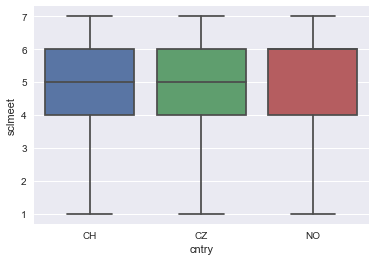

In [55]:

sns.boxplot(y="sclmeet", x="cntry", data=data[data.cntry.isin(['NO','CH','CZ'])])

plt.show()


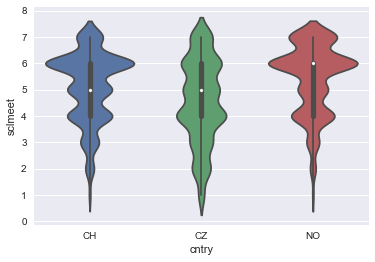

In [14]:

sns.violinplot(y="sclmeet", x="cntry", data=data[data.cntry.isin(['NO','CH','CZ'])])

plt.show()

In [54]:
print(NO_scl.sclmeet.mean(), CH_scl.sclmeet.mean(), CZ_scl.sclmeet.mean())

5.3023255813953485 5.160621761658031 4.445801526717557


In [56]:
print(NO_scl.sclmeet.median(), CH_scl.sclmeet.median(), CZ_scl.sclmeet.median())

6.0 6.0 4.0


OK so the boxplots actually dont reveal much (other than the median being lower for CZ), but the tukey HSD seems to show that Czech differs from the others, which we can confirm with the mean of each as well. 

# 6 Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out

In [16]:
# create activitys dataframe
act= data[data['year']==2014][['cntry','year','sclact']]


In [17]:
act.cntry.value_counts()

ES    1213
SE     908
CH     773
NO     731
CZ     658
DE      14
Name: cntry, dtype: int64

Going to pick Switzerland, Norway, and CZECH as they have similar sample sizes

In [18]:
act = act[act.cntry.isin(['NO','CH','CZ'])]
act = act.dropna()

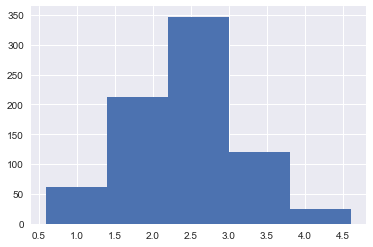

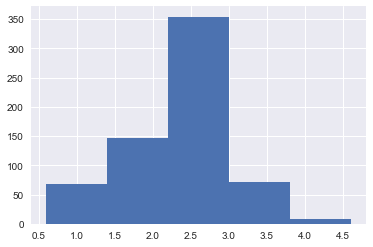

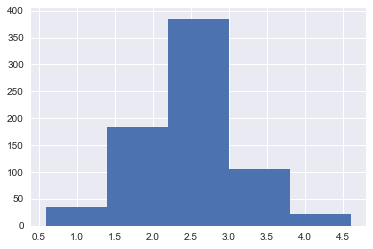

In [19]:
for country in act['cntry'].unique():
    plt.hist(act[act['cntry'] == country]['sclact'].values,align='left', bins =5)
    plt.show()

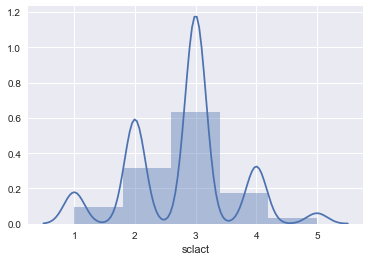

In [20]:
#lets also look at the distribution of the social meets variable in total 
sns.distplot(act.sclact.dropna(), bins=5)
plt.show()

In [21]:
#lets do a shapiro test 
stats.shapiro(act['sclact'])

(0.876844048500061, 3.146934356912164e-38)

This looks fairly normal, but lets proceed with the same tests/steps with did in 5. 

In [22]:
NO_scl= act[act['cntry'] == 'NO']
CH_scl= act[act['cntry'] == 'CH']
CZ_scl= act[act['cntry'] == 'CZ']

stats.f_oneway(NO_scl.sclact, CH_scl.sclact, CZ_scl.sclact)

F_onewayResult(statistic=5.5835444802767285, pvalue=0.0038141135259871419)

In [23]:
stats.kruskal(NO_scl.sclact, CH_scl.sclact, CZ_scl.sclact)

KruskalResult(statistic=7.6797142516482637, pvalue=0.021496672445053759)

there appears to be a statistical diff between the groups. 

ok so there is a difference, but which one is the odd country out? lets do a Turkey HSD.

In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=act['sclact'],      # Data
                          groups=act['cntry'],   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.0786,-0.187,0.0298,False
CH,NO,0.0774,-0.0277,0.1825,False
CZ,NO,0.156,0.0465,0.2656,True


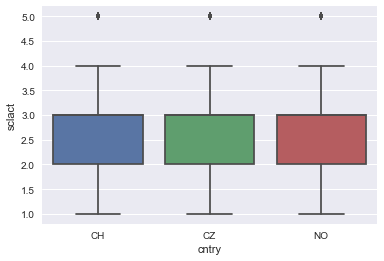

In [68]:

sns.boxplot(y="sclact", x="cntry", data=data[data.cntry.isin(['NO','CH','CZ'])])

plt.show()


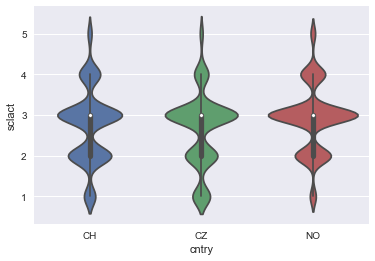

In [24]:

sns.violinplot(y="sclact", x="cntry", data=data[data.cntry.isin(['NO','CH','CZ'])])

plt.show()

In [69]:
print(NO_scl.sclact.mean(), CH_scl.sclact.mean(), CZ_scl.sclact.mean())

2.859097127222982 2.7816993464052286 2.703076923076923


In [70]:
print(NO_scl.sclact.median(), CH_scl.sclact.median(), CZ_scl.sclact.median())

3.0 3.0 3.0


OK so the tukey test revelas that the only statistial difference is between CZ and NO, butthats it. Threfore no coyntry really stands out here/ 